Course Name: Deep Learning

Lab Title: NLP Techniques for Text Classification

Student Name : Shravani Sakore

Student ID:202201060025

Date of Submission: 1-4-25

Group Members: Manvi Pawar,Kanishka Garud,Sakshi Dube

Objective The objective of this assignment is to implement NLP preprocessing techniques and build a text classification model using machine learning techniques.

Dataset : https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification

 Importing Necessary Libraries

In [12]:
import pandas as pd
import numpy as np
import nltk
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


 Downloading Required NLTK Data

In [13]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Loading the Dataset

In [14]:
dataset_path = "/content/ecommerceDataset.csv"  # Update this with the correct dataset path
df = pd.read_csv(dataset_path, on_bad_lines='skip', quoting=3)

# Display first few rows
print(df.head())

# Check dataset info
print(df.info())

# Check for missing values
print(df.isnull().sum())


   Household  \
0  Household   
1  Household   
2  Household   
3  Household   
4  Household   

  "Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang  \
0                "SAF 'Floral' Framed Painting (Wood                                                                                                                                                                                                                                                                                                           
1  "SAF 'UV Textured Modern Art Print Framed' Pai...                                                                                                                                                   

Handling Missing Values & Renaming Columns (If Needed)

In [15]:
print(df.columns)  # See the current column names
print(df.shape)    # Check the number of rows and columns


Index(['Household',
       '"Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang',
       ' you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints',
       ' with only the and inks and precision epson',
       ' roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks',
       ' to achieve brilliant and true colours. Due to their high level of uv resistance',
       ' our prints retain their beautiful colours for many years. Add colour and style to your living space with th

In [16]:
df = df.iloc[:, [0, -1]]  # Keeping only first and last columns (adjust as needed)
df.columns = ['Category', 'Text']


In [17]:
df.fillna("", inplace=True)


In [18]:
# Check dataset structure
print(df.shape)  # Number of rows & columns
print(df.columns)  # See current column names

# Keep only necessary columns
df = df.iloc[:, [0, -1]]  # Adjust column selection based on dataset
df.columns = ['Category', 'Text']

# Fill missing values
df.fillna("", inplace=True)

print(df.head())  # Verify everything is correct


(35663, 2)
Index(['Category', 'Text'], dtype='object')
    Category                                               Text
0  Household                                                   
1  Household                                                   
2  Household                                                   
3  Household   office or any room. A perfect size of 36 inch...
4  Household                                                   


 Preprocessing Function

In [19]:
from nltk.stem import PorterStemmer, SnowballStemmer

stemmer = PorterStemmer()  # or SnowballStemmer("english")

def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Apply stemming
    tokens = [stemmer.stem(word) for word in tokens]
    return " ".join(tokens)


 Applying Preprocessing

In [21]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the missing 'punkt_tab' data
df['Processed_Text'] = df['Text'].apply(preprocess_text)  # Apply function to 'Text' column

print(df.head())  # Check processed text


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


    Category                                               Text  \
0  Household                                                      
1  Household                                                      
2  Household                                                      
3  Household   office or any room. A perfect size of 36 inch...   
4  Household                                                      

                                      Processed_Text  
0                                                     
1                                                     
2                                                     
3  offic room perfect size 36 inch x 48 inch suit...  
4                                                     


 Text Vectorization (TF-IDF)

In [22]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Processed_Text'])
y = df['Category']  # Target variable

print("Shape of feature matrix:", X.shape)


Shape of feature matrix: (35663, 4531)


CountVectorizer

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(df['Processed_Text'])


Splitting Dataset into Training & Testing Sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)


Training data size: (28530, 4531)
Testing data size: (7133, 4531)


 Training Naïve Bayes Model

In [25]:
model = MultinomialNB()
model.fit(X_train, y_train)

print("Model training complete.")


Model training complete.


In [26]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.41097091 0.41097091 0.41026989 0.4106204  0.41044515]
Mean CV Accuracy: 0.4106554504030845


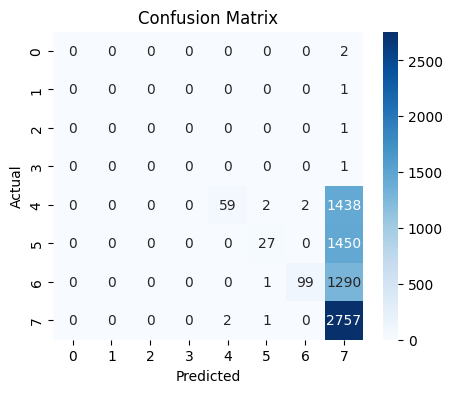

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Make predictions first
y_pred = model.predict(X_test)  # This line is added

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

 Making Predictions & Evaluating Model

In [29]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.41244917986821816


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                                                                                             precision    recall  f1-score   support

                                   Combined with a IPX4 Sweat/Dust/Splash Resistant design       0.00      0.00      0.00         2
                                                                     In our business model       0.00      0.00      0.00         1
 Submerge yourself in the limitless world of sound with the latest in Bluetooth innovation       0.00      0.00      0.00         1
                    When I heard of a concept that could make Soda right at home using Co2       0.00      0.00      0.00         1
                                                                                     Books       0.97      0.04      0.08      1501
                                                                    Clothing & Accessories       0.87      0.02      0.04      1477
                                                   

Logistic Regression Model

In [30]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Performance:
Accuracy: 0.41399130800504697
Classification Report:
                                                                                             precision    recall  f1-score   support

                                   Combined with a IPX4 Sweat/Dust/Splash Resistant design       0.00      0.00      0.00         2
                                                                     In our business model       0.00      0.00      0.00         1
 Submerge yourself in the limitless world of sound with the latest in Bluetooth innovation       0.00      0.00      0.00         1
                    When I heard of a concept that could make Soda right at home using Co2       0.00      0.00      0.00         1
                                                                                     Books       0.97      0.04      0.08      1501
                                                                    Clothing & Accessories       0.97      0.02      0.0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix Visualization

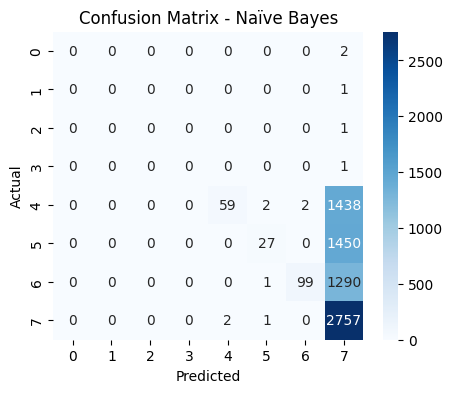

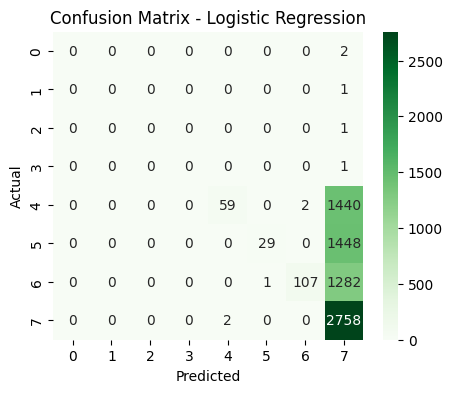

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix for Naïve Bayes
conf_mat_nb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat_nb, annot=True, cmap="Blues", fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naïve Bayes")
plt.show()

# Confusion Matrix for Logistic Regression
conf_mat_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat_lr, annot=True, cmap="Greens", fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


Evaluation Metrics

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Naïve Bayes Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))


Naïve Bayes Model Performance:
Accuracy: 0.41244917986821816
Precision: 0.7286030129880761
Recall: 0.41244917986821816
F1 Score: 0.26914358751099343


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
